In [31]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns
import plotly.express as px

In [32]:
# load dataset and view description
digits = datasets.load_digits()
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [33]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [34]:
print(digits.target)

[0 1 2 ... 8 9 8]


In [35]:

# use Kmeans without PCA
base_model = KMeans(n_clusters=10, random_state=10, n_init=10)
base_model.fit(digits.data)

KMeans(n_clusters=10, n_init=10, random_state=10)

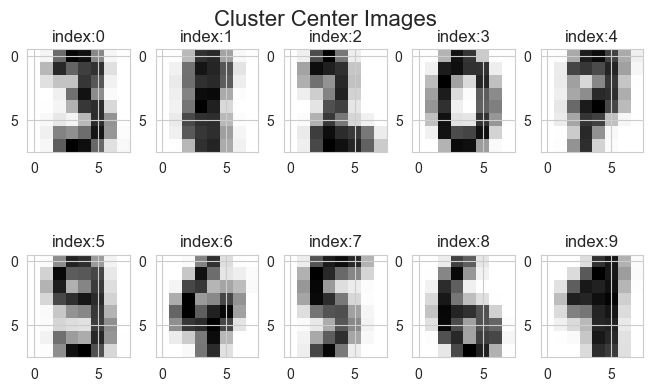

In [36]:
#show the cluster centers as images
fig = plt.figure(figsize=(8, 4))
fig.suptitle('Cluster Center Images', fontsize=16)
for i in range(10):
    ax = fig.add_subplot(2, 5, i+1)
    ax.title.set_text(f"index:{i}")
    ax.imshow(base_model.cluster_centers_[i].reshape((8, 8)), cmap='binary')

plt.subplots_adjust(hspace=1)
plt.show()

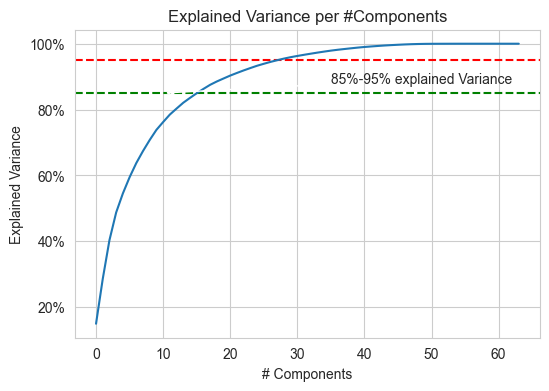

In [37]:
# use PCA to reduce the dimensionality of the dataset
pca = PCA(random_state=10)
pca.fit(digits.data)

# show the explained variance ratio to determine how many components to use
explained_variance = pca.explained_variance_ratio_.cumsum()
fig = plt.figure(figsize=(6, 4))
ax = plt.subplot()
plt.title('Explained Variance per #Components')
plt.xlabel('# Components')
plt.ylabel('Explained Variance')
ax.set_yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
ax.set_yticklabels(['0%', '20%', '40%', '60%', '80%', '100%'])
plt.annotate('85%-95% explained Variance ', xy=(10, 0.85), xytext=(35, 0.88),
             arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.axhline(y=0.95, color='r', linestyle='--')
plt.axhline(y=0.85, color='g', linestyle='--')
plt.plot(explained_variance)
plt.show()

With this in mind we can reduce the dimensionality of the dataset to 25 components and still retain around 90% of the explained variance.

In [38]:
# use Kmeans with PCA
pca = PCA(n_components=25, random_state=10)
pca.fit(digits.data)
pca_digits = pca.transform(digits.data)
pca_model = KMeans(n_clusters=10, random_state=1, n_init=10)
pca_model.fit(pca_digits)

KMeans(n_clusters=10, n_init=10, random_state=1)

In [39]:
# compare the two models using NMI
base_nmi = metrics.normalized_mutual_info_score(digits.target, base_model.labels_)
pca_nmi = metrics.normalized_mutual_info_score(digits.target, pca_model.labels_)
print(f"Base NMI: {round(base_nmi, 5)}")
print(f"PCA NMI: {round(pca_nmi, 5)}")

Base NMI: 0.74281
PCA NMI: 0.74062


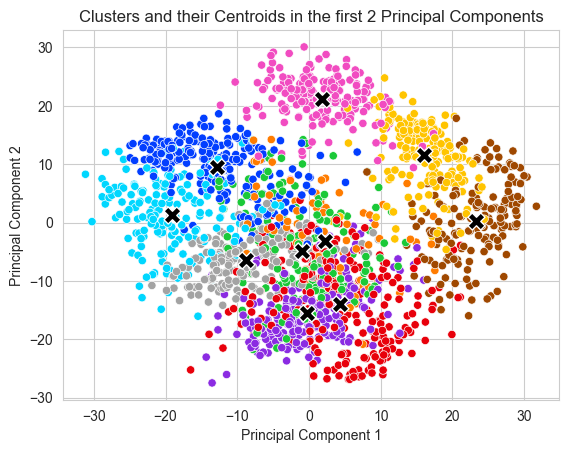

In [40]:
#show the cluster in the first 2 principal components
ax = plt.subplot()
plt.title('Clusters and their Centroids in the first 2 Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
sns.scatterplot(x=pca_digits[:, 0], y=pca_digits[:, 1], hue=pca_model.labels_, palette='bright', legend=False)
sns.scatterplot(x=pca_model.cluster_centers_[:, 0], y=pca_model.cluster_centers_[:, 1], color='black', legend=False, marker='X', s=150)
plt.show()

In [44]:
#show the cluster in the first 3 Principle components
fig = px.scatter_3d(x=pca_digits[:, 0], y=pca_digits[:, 1], z=pca_digits[:, 2], color=pca_model.labels_, opacity=0.8, size_max=5)
fig.update_layout(title='Clusters in the first 3 Principal Components')
fig.show()